In [1]:
!pip install pandas matplotlib


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import sqlite3

# Database path (saved in same folder as notebook)
db_path = "sales_data.db"

# Connect to database (creates it if not exists)
conn = sqlite3.connect(db_path)
cur = conn.cursor()

# Create sales table
cur.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL
)
""")

# Clear existing data to avoid duplicates on re-run
cur.execute("DELETE FROM sales")

# Insert new sample sales data
rows = [
    ("Headphones", 12, 2500),
    ("Monitor", 4, 15000),
    ("Keyboard", 10, 1200),
    ("Mouse", 15, 800),
    ("Headphones", 8, 2500),
    ("Monitor", 2, 15000),
    ("Keyboard", 5, 1200),
    ("Mouse", 10, 800)
]
cur.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", rows)

conn.commit()


print("Database created and sample data inserted.")

for row in rows:
    print(row)
conn.close()

Database created and sample data inserted.
('Headphones', 12, 2500)
('Monitor', 4, 15000)
('Keyboard', 10, 1200)
('Mouse', 15, 800)
('Headphones', 8, 2500)
('Monitor', 2, 15000)
('Keyboard', 5, 1200)
('Mouse', 10, 800)


In [5]:
import pandas as pd

# Connect to database
conn = sqlite3.connect(db_path)

# SQL query for total quantity & revenue by product
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC
"""
df = pd.read_sql_query(query, conn)

# Optional: Overall totals
totals = pd.read_sql_query("""
SELECT
    SUM(quantity) AS grand_total_qty,
    SUM(quantity * price) AS grand_revenue
FROM sales
""", conn)

conn.close()

print("Per-product summary:")
display(df)

print("\nOverall totals:")
display(totals)


Per-product summary:


,product,total_qty,revenue
0,Monitor,6,90000.0
1,Headphones,20,50000.0
2,Mouse,25,20000.0
3,Keyboard,15,18000.0



Overall totals:


,grand_total_qty,grand_revenue
0,66,178000.0


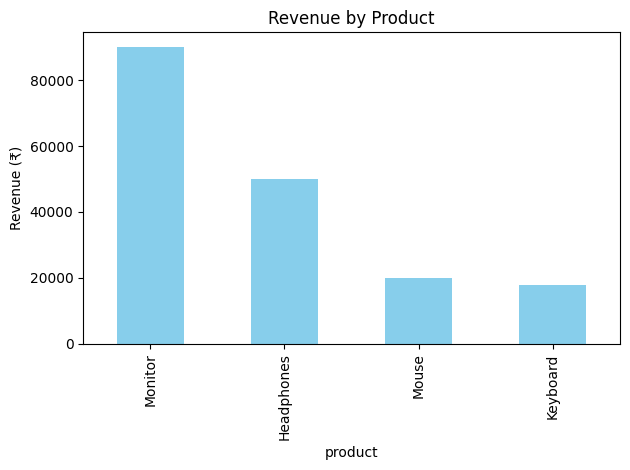

In [6]:
import matplotlib.pyplot as plt

# Plot revenue by product
df.plot(kind="bar", x="product", y="revenue", legend=False, color="skyblue")
plt.ylabel("Revenue (₹)")
plt.title("Revenue by Product")
plt.tight_layout()
plt.savefig("sales_chart.png")  # Save chart for GitHub submission
plt.show()
